In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns    

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

pd.set_option("display.max_columns",None)
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('id',axis=1, inplace=True)

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# checking zero values in integer columns
j = 0
for column in df.columns:
    if (df[column].dtype == 'int64' and (df[column]==0).sum()!=0):
        print(j+1,'. ',column ,df[column].dtype ,(df[column]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [12]:
# checking zero values in float columns
j = 0
for column in df.columns:
    if (df[column].dtype == 'float64' and (df[column]==0).sum()!=0):
        print(j+1,'. ',column ,df[column].dtype ,(df[column]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  concavity_mean float64 13
2 .  concave points_mean float64 13
3 .  concavity_se float64 13
4 .  concave points_se float64 13
5 .  concavity_worst float64 13
6 .  concave points_worst float64 13

Total Features:  6


In [13]:
for column in df.columns:
    if df[column].dtype == 'float64':
        df = df[df[column]!=0]

In [14]:
# checking zero values in float columns
j = 0
for column in df.columns:
    if (df[column].dtype == 'float64' and (df[column]==0).sum()!=0):
        print(j+1,'. ',column ,df[column].dtype ,(df[column]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                556 non-null    object 
 1   radius_mean              556 non-null    float64
 2   texture_mean             556 non-null    float64
 3   perimeter_mean           556 non-null    float64
 4   area_mean                556 non-null    float64
 5   smoothness_mean          556 non-null    float64
 6   compactness_mean         556 non-null    float64
 7   concavity_mean           556 non-null    float64
 8   concave points_mean      556 non-null    float64
 9   symmetry_mean            556 non-null    float64
 10  fractal_dimension_mean   556 non-null    float64
 11  radius_se                556 non-null    float64
 12  texture_se               556 non-null    float64
 13  perimeter_se             556 non-null    float64
 14  area_se                  556 no

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts(),'\n')

diagnosis
B    344
M    212
Name: count, dtype: int64 



In [17]:
le = LabelEncoder()

In [18]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [19]:
df['diagnosis'].value_counts()

diagnosis
0    344
1    212
Name: count, dtype: int64

In [20]:
correlation = df.corr()
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.727772,0.433880,0.740650,0.704565,0.355230,0.589710,0.691133,0.773706,0.332983,-0.007387,0.568665,0.028291,0.556010,0.545599,-0.052299,0.281915,0.239474,0.393402,0.015453,0.077804,0.774184,0.468276,0.780801,0.729698,0.417629,0.583567,0.653709,0.796344,0.413806,0.320228
radius_mean,0.727772,1.000000,0.343925,0.997764,0.988084,0.157287,0.492291,0.666891,0.817005,0.150938,-0.305723,0.689788,-0.055854,0.682043,0.740486,-0.199884,0.184995,0.167118,0.338588,-0.070626,-0.042050,0.968670,0.304704,0.964066,0.941570,0.103054,0.393691,0.507812,0.732540,0.157179,-0.002621
texture_mean,0.433880,0.343925,1.000000,0.350646,0.338021,0.004953,0.257085,0.322500,0.315584,0.093134,-0.065109,0.277490,0.385760,0.284532,0.266480,0.001744,0.205580,0.156403,0.189815,0.003183,0.058102,0.372192,0.910433,0.378684,0.360130,0.104385,0.299520,0.324244,0.326847,0.122248,0.134296
perimeter_mean,0.740650,0.997764,0.350646,1.000000,0.987188,0.194998,0.544678,0.707566,0.846430,0.187047,-0.254267,0.702879,-0.042292,0.701554,0.749893,-0.179031,0.230945,0.201970,0.371275,-0.046225,-0.004146,0.968566,0.311453,0.969483,0.942012,0.134559,0.437326,0.546117,0.760817,0.182763,0.042226
area_mean,0.704565,0.988084,0.338021,0.987188,1.000000,0.165946,0.486202,0.677449,0.818449,0.152863,-0.278467,0.739358,-0.028882,0.731188,0.802171,-0.147438,0.195469,0.186146,0.343963,-0.044331,-0.019616,0.961839,0.293691,0.958139,0.958411,0.109212,0.373281,0.496756,0.713891,0.136460,-0.005125
smoothness_mean,0.355230,0.157287,0.004953,0.194998,0.165946,1.000000,0.658660,0.521294,0.553796,0.556780,0.591159,0.308045,0.135289,0.300717,0.246438,0.346371,0.309733,0.237726,0.370267,0.229538,0.280362,0.202558,0.055078,0.228647,0.197727,0.800004,0.466523,0.429607,0.500667,0.389899,0.495327
compactness_mean,0.589710,0.492291,0.257085,0.544678,0.486202,0.658660,1.000000,0.880493,0.826595,0.609993,0.584298,0.500576,0.112151,0.550640,0.452653,0.160844,0.733297,0.559174,0.630182,0.273725,0.513302,0.522575,0.257911,0.578927,0.498574,0.557687,0.861849,0.811184,0.812286,0.507323,0.688115
concavity_mean,0.691133,0.666891,0.322500,0.707566,0.677449,0.521294,0.880493,1.000000,0.918966,0.508586,0.354134,0.637365,0.141284,0.664004,0.616709,0.129823,0.663447,0.682546,0.672207,0.219603,0.457026,0.678757,0.309514,0.721255,0.668044,0.442105,0.747679,0.880421,0.859103,0.405892,0.514321
concave points_mean,0.773706,0.817005,0.315584,0.846430,0.818449,0.553796,0.826595,0.918966,1.000000,0.470788,0.181563,0.706897,0.086820,0.717134,0.692256,0.058750,0.478144,0.421325,0.595970,0.137555,0.262143,0.824826,0.303373,0.851157,0.805209,0.445011,0.656154,0.742496,0.908038,0.371157,0.364630
symmetry_mean,0.332983,0.150938,0.093134,0.187047,0.152863,0.556780,0.609993,0.508586,0.470788,1.000000,0.477269,0.306164,0.174235,0.316578,0.225639,0.181831,0.424370,0.346246,0.407034,0.462728,0.327769,0.188775,0.109083,0.222930,0.178527,0.421820,0.479011,0.441566,0.443408,0.699113,0.435645


<Axes: >

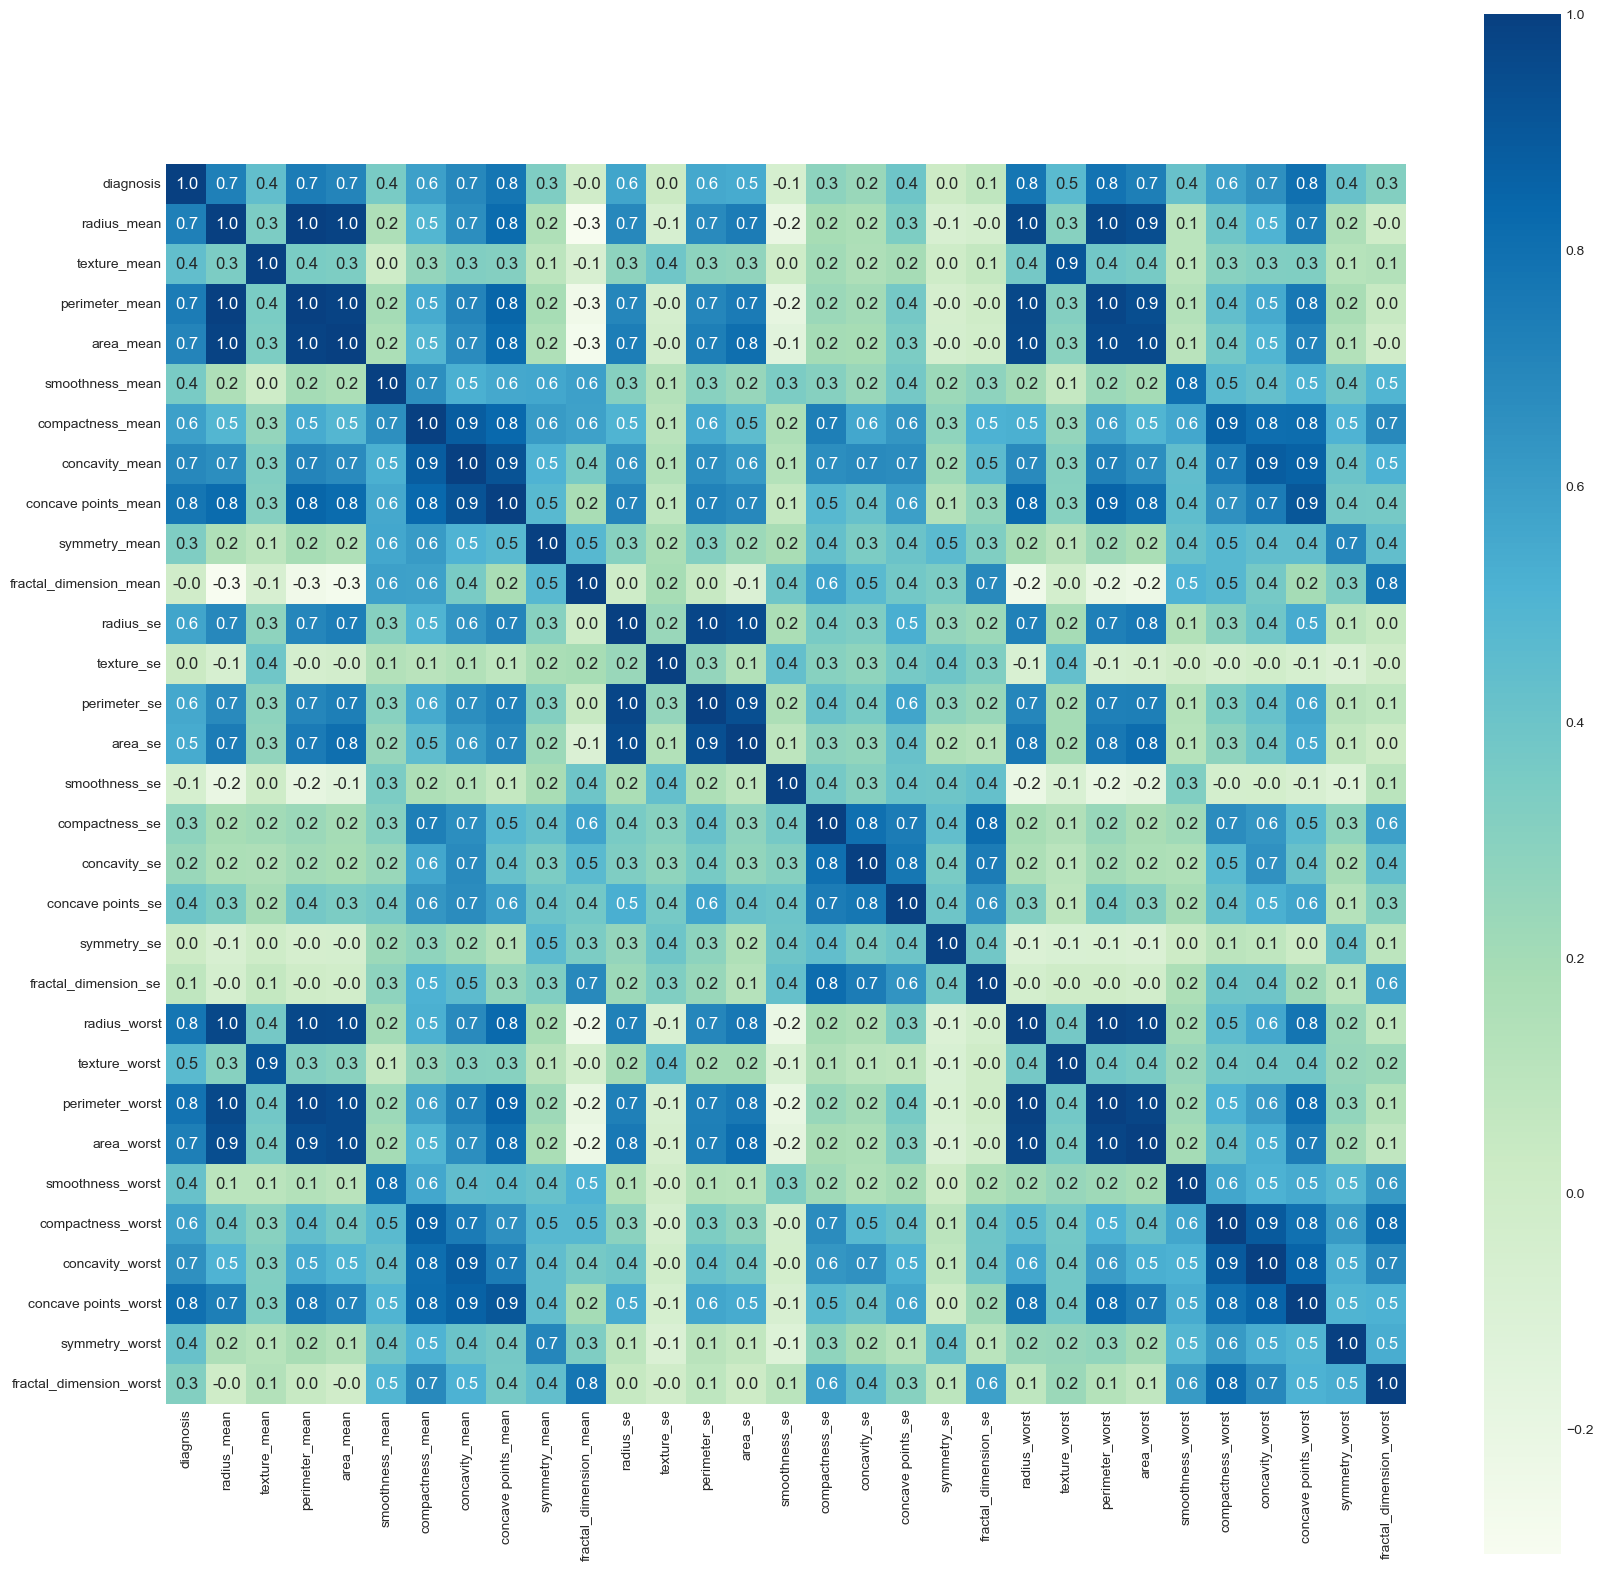

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',cmap='GnBu',
            annot=True,annot_kws={'size':12})

In [22]:
df.shape

(556, 31)

In [23]:
# understand the columns having low correlation
li = []
target = ['diagnosis']
j = 0
for column in df.columns:
    if ((correlation[column] <= 0).sum()) >= 10:
        if column not in target:
            print(j,'.',column,(correlation[column] <= 0).sum())
            li.append(column)
            j = j+1

0 . fractal_dimension_mean 10
1 . texture_se 12
2 . smoothness_se 12


In [24]:
df['concavity_mean'].value_counts()

concavity_mean
0.120400    3
0.111500    2
0.033440    2
0.110300    2
0.108500    2
           ..
0.065930    1
0.248700    1
0.287100    1
0.009193    1
0.351400    1
Name: count, Length: 536, dtype: int64

# Data Spliting 

In [25]:
X = df.drop('concavity_mean',axis=1)
Y = df['concavity_mean']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 567
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                556 non-null    int32  
 1   radius_mean              556 non-null    float64
 2   texture_mean             556 non-null    float64
 3   perimeter_mean           556 non-null    float64
 4   area_mean                556 non-null    float64
 5   smoothness_mean          556 non-null    float64
 6   compactness_mean         556 non-null    float64
 7   concave points_mean      556 non-null    float64
 8   symmetry_mean            556 non-null    float64
 9   fractal_dimension_mean   556 non-null    float64
 10  radius_se                556 non-null    float64
 11  texture_se               556 non-null    float64
 12  perimeter_se             556 non-null    float64
 13  area_se                  556 non-null    float64
 14  smoothness_se            556 no

In [27]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 556 entries, 0 to 567
Series name: concavity_mean
Non-Null Count  Dtype  
--------------  -----  
556 non-null    float64
dtypes: float64(1)
memory usage: 8.7 KB


In [28]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.2,random_state=30)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   444
Size of Train Y =   444
Size of Test X =   112
Size of Test Y =   112


# <U>SVM REGRESSOR</U>

In [29]:
from sklearn import svm

svr = svm.SVR(kernel='linear')
svr.fit(X_TRAIN,Y_TRAIN)

SVR(kernel='linear')

## Training

In [30]:
# accuracy for prediction on training data
training_data_prediction = svr.predict(X_TRAIN)
print(training_data_prediction)

[0.18168907 0.18880421 0.1167323  0.11607518 0.10886396 0.18583739
 0.17409037 0.10816923 0.15858049 0.11164847 0.12323488 0.1213022
 0.1002733  0.11228282 0.11886078 0.14147216 0.12208003 0.10548741
 0.11094647 0.11146571 0.17760963 0.11216599 0.10534405 0.12590693
 0.1420996  0.155337   0.10838847 0.13181723 0.12270901 0.1688816
 0.14817775 0.27273072 0.12144175 0.18604144 0.22725518 0.14819763
 0.12763614 0.21742773 0.10269081 0.1023475  0.1120005  0.24125801
 0.13441985 0.18706149 0.12802038 0.10974201 0.1804179  0.1382504
 0.15043287 0.10152378 0.11898892 0.13030634 0.13001594 0.11481335
 0.22753124 0.17426984 0.18107395 0.11245937 0.17614968 0.11695727
 0.1690938  0.11927572 0.17418693 0.122083   0.21094486 0.11428355
 0.12282491 0.24280061 0.14254482 0.16338546 0.46330806 0.19737276
 0.17633875 0.12012201 0.13432566 0.12135085 0.11952971 0.11742942
 0.10692801 0.10941246 0.17416732 0.29460418 0.11576517 0.11889155
 0.1032681  0.10216294 0.12954729 0.17118373 0.22462256 0.2973814

In [31]:
#  R squared error
score_1 = r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.26053921208204034
Mean Absolute Error :  0.06179693235193922


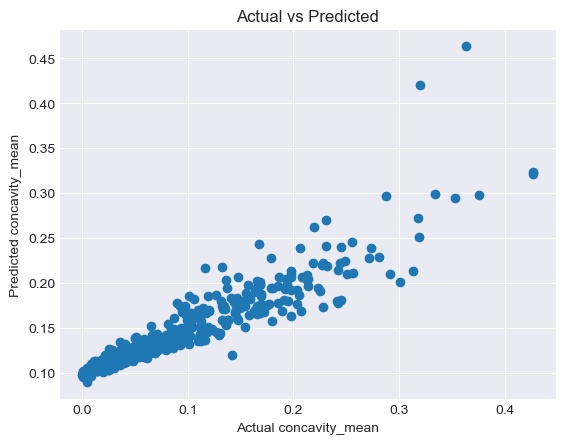

In [32]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual concavity_mean")
plt.ylabel("Predicted concavity_mean")
plt.title("Actual vs Predicted")
plt.show()

# Testing

In [33]:
y_pred = svr.predict(X_TEST)
y_pred

array([0.15452534, 0.16708828, 0.1086575 , 0.12330391, 0.17067301,
       0.11540672, 0.24339277, 0.1143753 , 0.13713683, 0.10096775,
       0.12607418, 0.17002295, 0.15423292, 0.10826617, 0.11204458,
       0.13280302, 0.10783029, 0.13912381, 0.10228494, 0.20198977,
       0.20111698, 0.11895169, 0.1111164 , 0.18121661, 0.21552696,
       0.11708636, 0.14165423, 0.18623645, 0.13586491, 0.12361712,
       0.11415282, 0.12902191, 0.11314605, 0.13534519, 0.13115492,
       0.11482714, 0.13524528, 0.10990569, 0.16552375, 0.1609584 ,
       0.113148  , 0.30933592, 0.11488688, 0.13135651, 0.09747807,
       0.10242824, 0.11680504, 0.13254678, 0.11936286, 0.121022  ,
       0.11849118, 0.17821688, 0.12001143, 0.14858098, 0.1144854 ,
       0.15698949, 0.19381779, 0.11087749, 0.18821786, 0.12980379,
       0.14538322, 0.18677053, 0.10857672, 0.25698625, 0.19077725,
       0.16145452, 0.10588391, 0.14346443, 0.11936578, 0.10365464,
       0.14732207, 0.19296756, 0.19274446, 0.20578622, 0.10428

In [34]:
# R squared Score
score_1 = r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = mean_absolute_error(Y_TEST, y_pred)

print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.21221855536510958
Mean Absolute Error :  0.0655880740854227


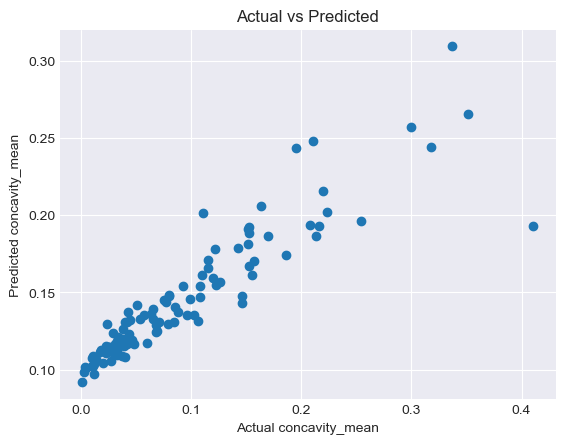

In [35]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual concavity_mean")
plt.ylabel("Predicted concavity_mean")
plt.title("Actual vs Predicted")
plt.show()

# <u>RANDOM FOREST REGRESSOR</u>

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=25)
# fit the regressor with X and Y data 
regressor.fit(X_TRAIN, Y_TRAIN) 

RandomForestRegressor(n_estimators=5, random_state=25)

## Training Data

In [37]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[0.15528    0.147      0.031346   0.02662    0.020482   0.13054
 0.091278   0.02987    0.1379     0.025976   0.044146   0.040488
 0.0021622  0.039988   0.040306   0.074412   0.066042   0.03107
 0.02531    0.032496   0.18804    0.01908    0.01583    0.028014
 0.096366   0.1357     0.02265    0.101718   0.058168   0.15652
 0.096322   0.3174     0.045048   0.2049     0.18442    0.11894
 0.055202   0.13892    0.017874   0.0063278  0.044286   0.22656
 0.041488   0.12934    0.083972   0.0092318  0.24448    0.053148
 0.102894   0.01487    0.03869    0.067016   0.088132   0.035028
 0.24954    0.101752   0.1349     0.028424   0.1772     0.02506
 0.113794   0.048402   0.113982   0.057952   0.25764    0.034916
 0.068318   0.17242    0.0735     0.100268   0.339      0.17936
 0.16878    0.046026   0.091714   0.048372   0.041748   0.02923
 0.02462    0.01753    0.13566    0.38194    0.045706   0.044614
 0.01993    0.01012    0.045278   0.14232    0.27062    0.36938
 0.024682   0.080686   0.027348   

In [38]:
#  R squared error
score_1 = r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9832947293048087
Mean Absolute Error :  0.005285708243243244


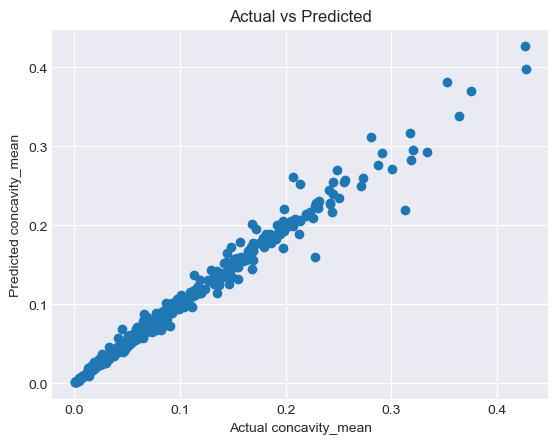

In [39]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual concavity_mean")
plt.ylabel("Predicted concavity_mean")
plt.title("Actual vs Predicted")
plt.show()

## Testing Data

In [40]:
y_pred = regressor.predict(X_TEST)
y_pred

array([0.113592 , 0.15052  , 0.009608 , 0.04608  , 0.083994 , 0.034128 ,
       0.21368  , 0.033176 , 0.052636 , 0.0051046, 0.052824 , 0.13462  ,
       0.088992 , 0.025186 , 0.032654 , 0.086596 , 0.0055708, 0.07355  ,
       0.013668 , 0.2283   , 0.120292 , 0.0347   , 0.015772 , 0.14252  ,
       0.19256  , 0.063888 , 0.05405  , 0.20764  , 0.0843   , 0.027166 ,
       0.041078 , 0.059846 , 0.042344 , 0.054048 , 0.055608 , 0.031368 ,
       0.107614 , 0.0308   , 0.096708 , 0.090224 , 0.02445  , 0.31658  ,
       0.035044 , 0.10704  , 0.0113352, 0.015332 , 0.039212 , 0.055482 ,
       0.047916 , 0.03775  , 0.047664 , 0.133312 , 0.040676 , 0.094472 ,
       0.02779  , 0.12778  , 0.22178  , 0.026012 , 0.1417   , 0.066704 ,
       0.079324 , 0.17232  , 0.038946 , 0.24784  , 0.15906  , 0.18582  ,
       0.025486 , 0.16432  , 0.02762  , 0.014792 , 0.11202  , 0.20674  ,
       0.216    , 0.14222  , 0.01864  , 0.0454   , 0.065788 , 0.16412  ,
       0.094072 , 0.29604  , 0.09474  , 0.033028 , 

In [41]:
#  R squared error
score_1 = r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = mean_absolute_error(Y_TEST, y_pred)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9018747116163447
Mean Absolute Error :  0.012435364285714286


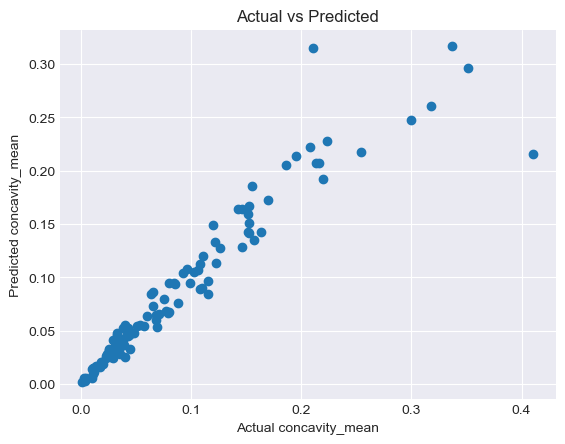

In [42]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual concavity_mean")
plt.ylabel("Predicted concavity_mean")
plt.title("Actual vs Predicted")
plt.show()

<b>The <u>RANDOM FOREST REGRESSOR</u> with 90% testing accuracy, predicted '<i><u>concavity_mean</u></i>' better than <u>SVR</u> with testing accuracy 21%.</b>